In [1]:
# HIDDEN
# The standard set of libraries we need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

# The standard library for data in tables
import pandas as pd

# A tiny function to read a file directly from a URL
from urllib.request import urlopen

def read_url(url):
    return urlopen(url).read().decode()

This page is largely derived from `Another_Kind_Of_Character` of the UC
Berkeley course \- see the license file on the main website.

In [2]:
# HIDDEN
# Read the text of Alice, split into chapters.
alice_url = 'http://www.gutenberg.org/cache/epub/42671/pg42671.txt'
alice_text = read_url(alice_url)
# Break the text into Chapters
alice_chapters = alice_text.split('CHAPTER ')
# Drop the first "Chapter" - it's the Project Gutenberg header
alice_chapters = alice_chapters[1:]

In some situations, the relationships between quantities allow us to make
predictions. This text will explore how to make accurate predictions based on
incomplete information and develop methods for combining multiple sources of
uncertain information to make decisions.

As an example of visualizing information derived from multiple sources, let us
first use the computer to get some information that would be tedious to
acquire by hand. In the context of novels, the word "character" has a second
meaning: a printed symbol such as a letter or number or punctuation symbol.
Here, we ask the computer to count the number of characters and the number of
periods in each chapter of *Alice's Adventures in Wonderland*.

In [3]:
# In each chapter, count the number of all characters;
# Also count the number of periods.
chars_periods = pd.DataFrame.from_dict({
        'Number of chars in chapter': [len(s) for s in alice_chapters],
        'Number of periods': np.char.count(alice_chapters, '.')
    })

Here are the data. Each row of the table corresponds to one chapter of the
novel and displays the number of characters as well as the number of periods
in the chapter. Not surprisingly, chapters with fewer characters also tend to
have fewer periods, in general – the shorter the chapter, the fewer sentences
there tend to be, and vice versa. The relation is not entirely predictable,
however, as sentences are of varying lengths and can involve other punctuation
such as question marks.

In [4]:
chars_periods

,Number of chars in chapter,Number of periods
0,4613,59
1,4420,63
2,9746,106
3,6045,54
4,5390,61
5,13287,114
6,11492,111
7,11274,109
8,9971,119
9,12798,126


In the plot below, there is a dot for each chapter in the book. The horizontal
axis represents the number of periods and the vertical axis represents the
number of characters.

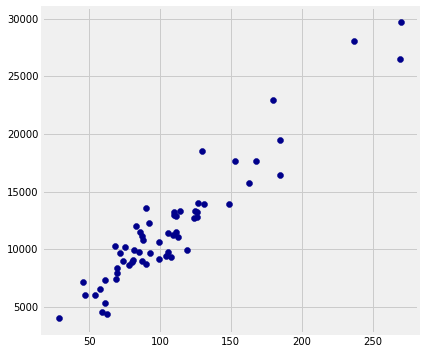

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(chars_periods['Number of periods'],
            chars_periods['Number of chars in chapter'],
            color='darkblue')

Notice how the blue points are roughly clustered around a straight line.

Now look at all the chapters that contain about 100 periods. The plot shows
that those chapters contain about 10,000 characters to about 15,000
characters, roughly. That's about 100 to 150 characters per period.

Indeed, it appears from looking at the plot that the chapters tend to have
somewhere between 100 and 150 characters between periods, as a very rough
estimate. Perhaps these Lewis Carroll and Alice were announcing something
familiar to us now: the original 140-character limit of Twitter.